In [12]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, models
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from pathlib import Path


In [4]:
dataset_path = Path(r'./data/lab2')

file_path = list(dataset_path.glob(r'**/*.png'))

# create labels from the folder name
labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], file_path))


In [7]:
file_path = pd.Series(file_path).astype(str)
labels = pd.Series(labels)

df = pd.concat([file_path, labels], axis=1)

df.columns = ['image', 'label']

df.head()


,image,label
0,data/lab2/Shrimp/Shrimp/00047.png,Shrimp
1,data/lab2/Shrimp/Shrimp/00056.png,Shrimp
2,data/lab2/Shrimp/Shrimp/00168.png,Shrimp
3,data/lab2/Shrimp/Shrimp/00657.png,Shrimp
4,data/lab2/Shrimp/Shrimp/00795.png,Shrimp


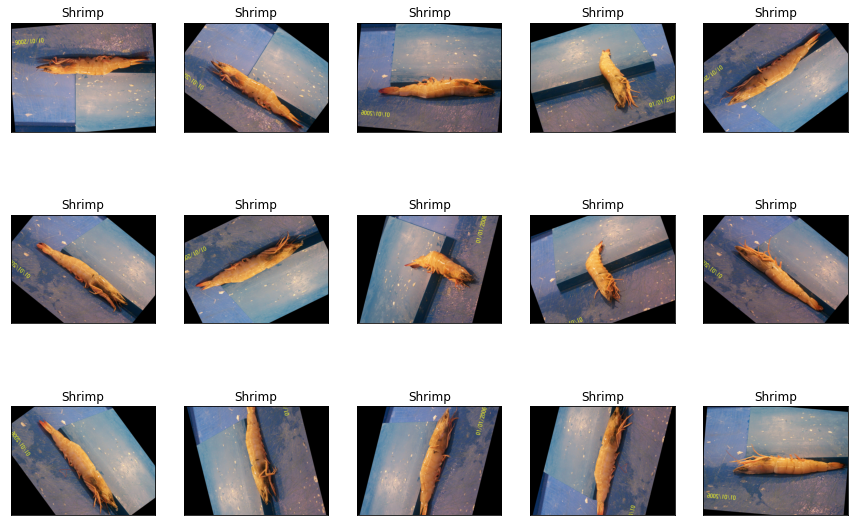

In [8]:
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(
    15, 10), subplot_kw={'xticks': [], 'yticks': []})
for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(df.image[i]))
    ax.set_title(df.label[i])

plt.show()


In [9]:
df.label.value_counts()


Shrimp                   1000
Shrimp GT                1000
Red Sea Bream            1000
Black Sea Sprat GT       1000
Black Sea Sprat          1000
Trout                    1000
Trout GT                 1000
Striped Red Mullet       1000
Striped Red Mullet GT    1000
Gilt-Head Bream          1000
Gilt-Head Bream GT       1000
Red Mullet               1000
Red Mullet GT            1000
Hourse Mackerel          1000
Hourse Mackerel GT       1000
Sea Bass                 1000
Sea Bass GT              1000
Red Sea Bream GT         1000
Name: label, dtype: int64

In [10]:
df = df[df['label'].apply(lambda x: x[-2:] != 'GT')].reset_index(drop=True)
df.label.value_counts()


Shrimp                1000
Sea Bass              1000
Hourse Mackerel       1000
Red Mullet            1000
Gilt-Head Bream       1000
Striped Red Mullet    1000
Trout                 1000
Black Sea Sprat       1000
Red Sea Bream         1000
Name: label, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size=0.3, random_state=30)
x_train, x_val = train_test_split(x_train, test_size=0.2, random_state=30)

print("Shape of training data", x_train.shape)
print("Shape of test data", x_test.shape)
print("Shape of validation data", x_val.shape)


Shape of training data (5040, 2)
Shape of test data (2700, 2)
Shape of validation data (1260, 2)


In [13]:
image_data_generator = ImageDataGenerator(rescale=1./255,
                                          rotation_range=40,
                                          width_shift_range=0.2,
                                          height_shift_range=0.2,
                                          shear_range=0.2,
                                          zoom_range=0.2,
                                          horizontal_flip=True,
                                          fill_mode='nearest')

train = image_data_generator.flow_from_dataframe(dataframe=x_train, x_col='image', y_col='label', target_size=(
    200, 200), color_mode='rgb', class_mode='categorical', shuffle=True)
test = image_data_generator.flow_from_dataframe(dataframe=x_test, x_col='image', y_col='label', target_size=(
    200, 200), color_mode='rgb', class_mode='categorical', shuffle=True)
val = image_data_generator.flow_from_dataframe(dataframe=x_val, x_col='image', y_col='label', target_size=(
    200, 200), color_mode='rgb', class_mode='categorical', shuffle=True)


Found 5040 validated image filenames belonging to 9 classes.
Found 2700 validated image filenames belonging to 9 classes.
Found 1260 validated image filenames belonging to 9 classes.


In [ ]:
input_shape = (200, 200, 3)

model = models.Sequential([
    layers.Conv2D(64, (3,3), activation='relu', input_shape=input_shape ),
    layers.MaxPool2D(pool_size = (2,2)),
    # Other...
])

model.summary()